In [21]:
%matplotlib notebook
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
from sklearn.cross_validation import train_test_split
#import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns
import matplotlib as plt
import math
from IPython.display import display
import sys
import pylab as pl

In [22]:
# Loading data
org_data = pd.read_csv(r'C:/Users/IBM_ADMIN/Desktop/adultdata.txt',
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")
org_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


<IPython.core.display.Javascript object>


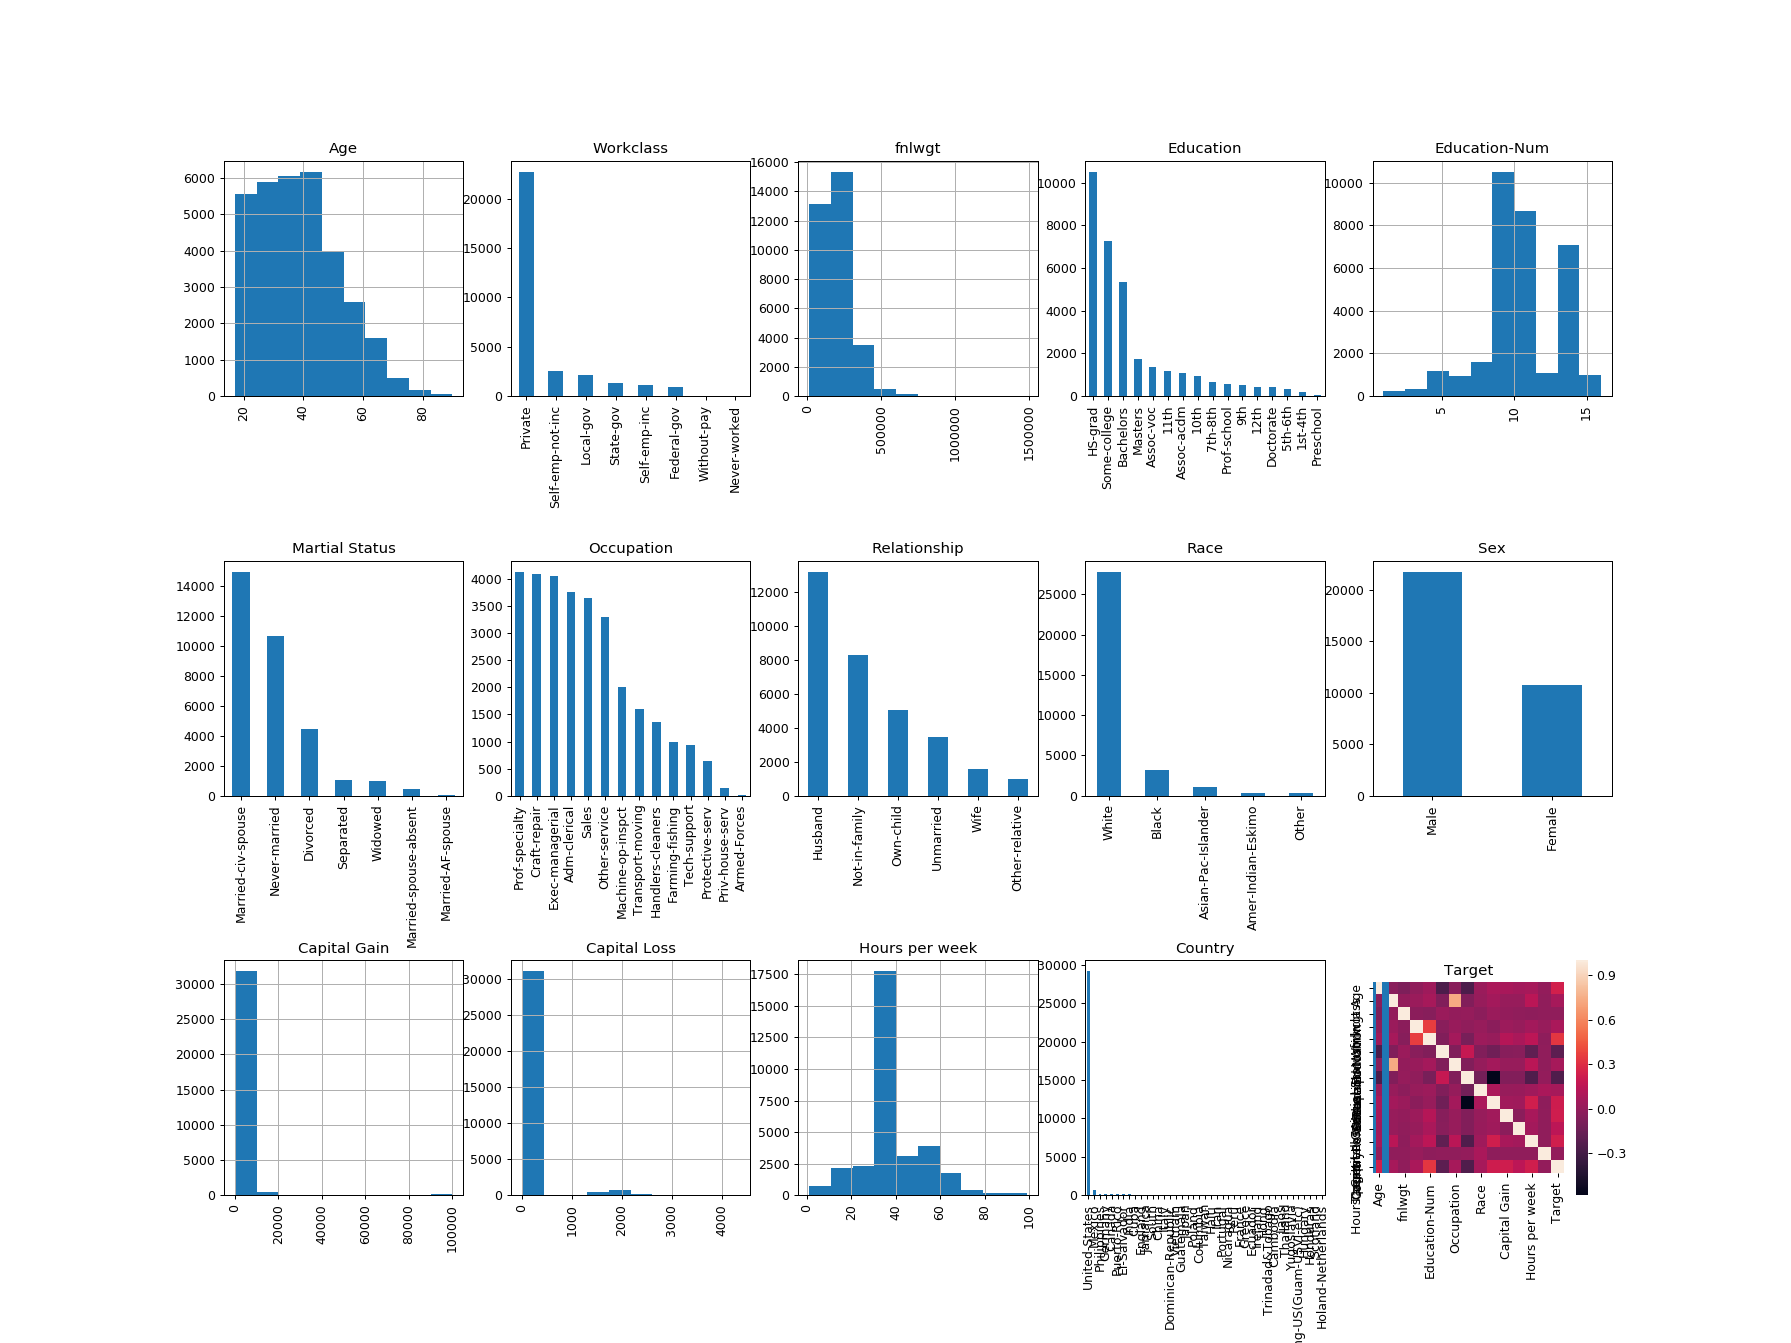

In [23]:
# Histogram for analyzing the data
fig = pl.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(org_data.shape[1]) / cols)
for i, column in enumerate(org_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if org_data.dtypes[column] == np.object:
        org_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        org_data[column].hist(axes=ax)
        pl.xticks(rotation="vertical")
pl.subplots_adjust(hspace=0.7, wspace=0.2)

In [24]:
(org_data["Country"].value_counts() / org_data.shape[0]).head()

United-States    0.895857
Mexico           0.019748
Philippines      0.006081
Germany          0.004207
Canada           0.003716
Name: Country, dtype: float64

In [25]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(org_data)
sns.heatmap(encoded_data.corr(), square=True)
pl.show()

In [26]:
# deleting correlated data
del org_data["Education"]

<IPython.core.display.Javascript object>


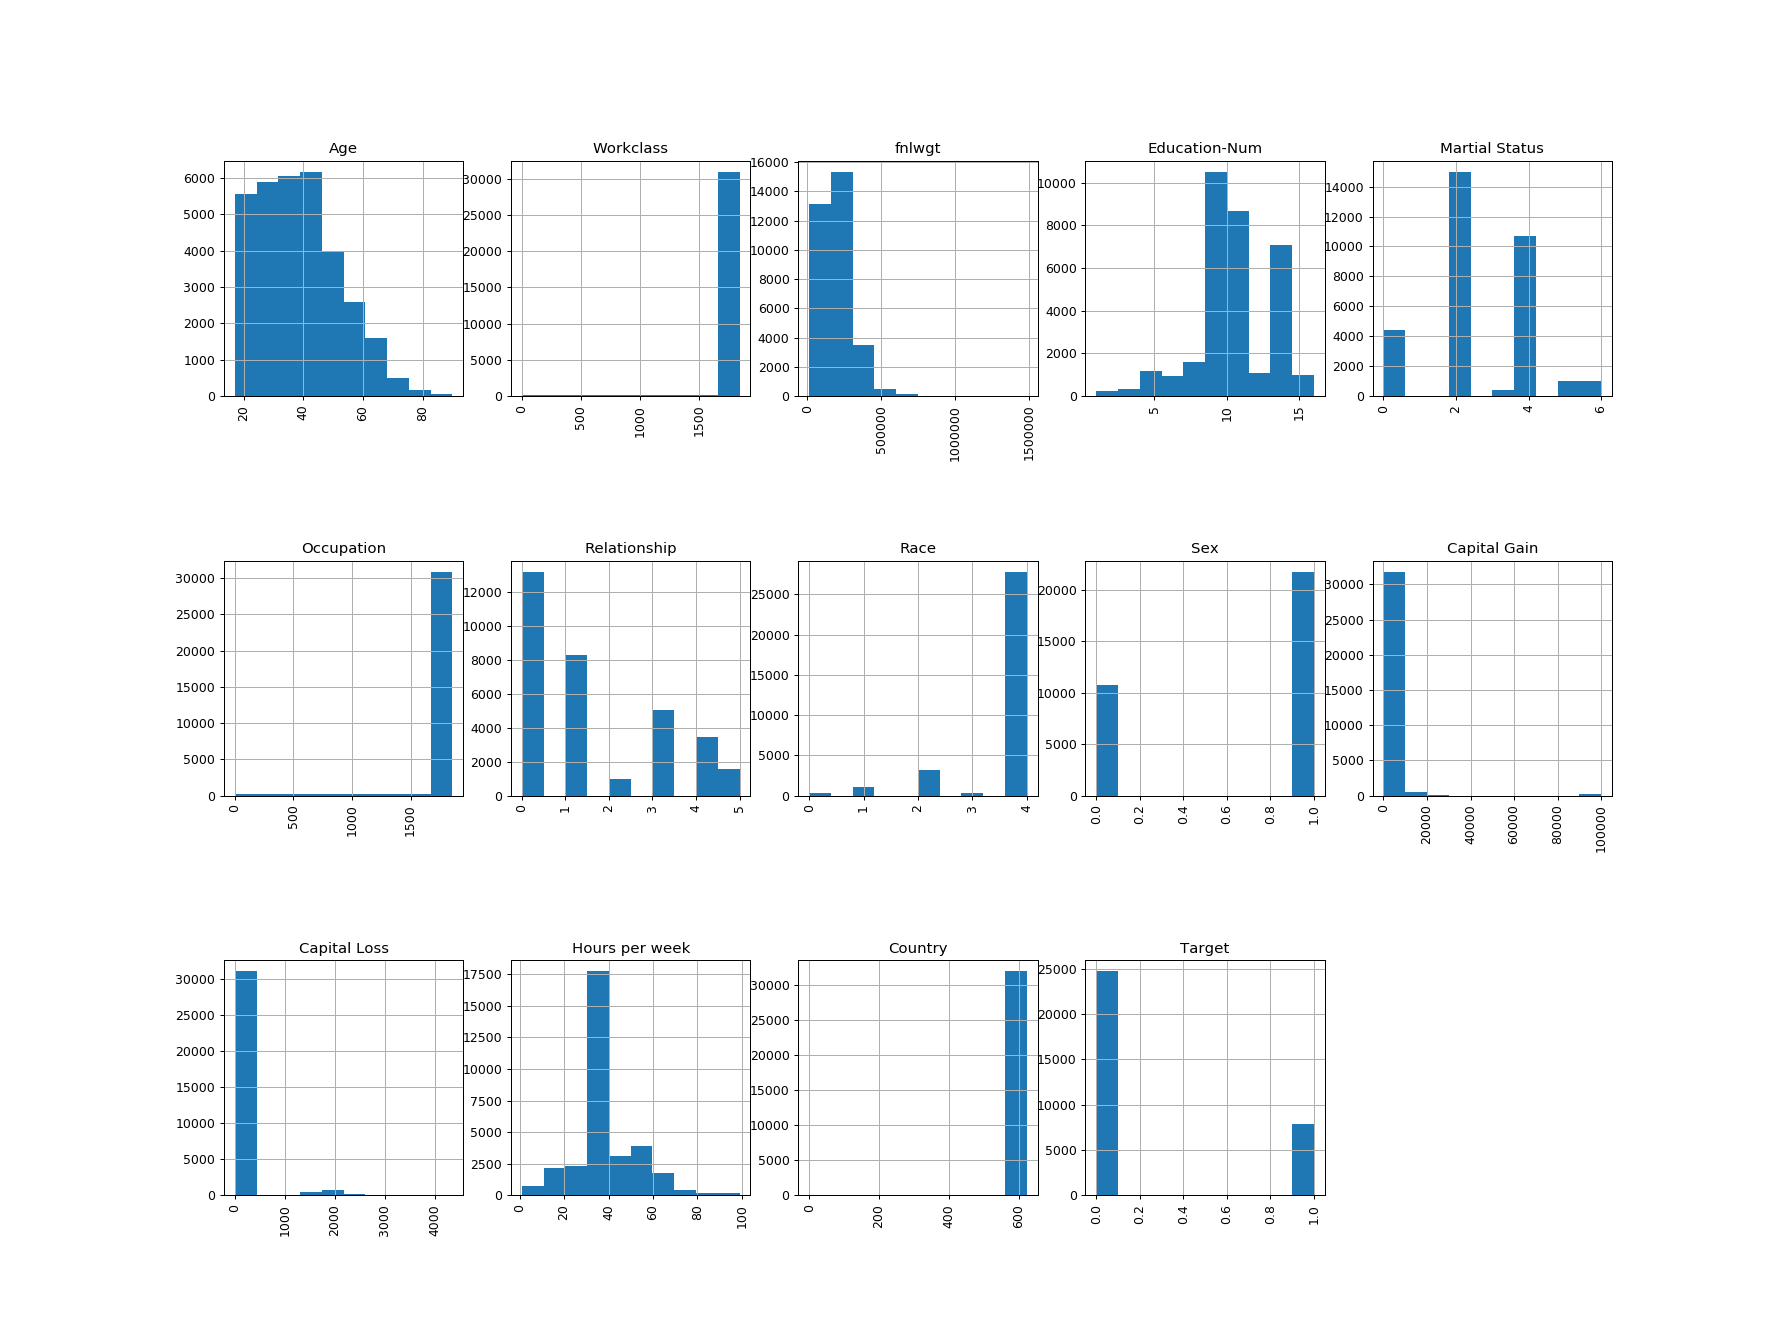

In [27]:
#Histogram of encoded data
encoded_data, encoders = number_encode_features(org_data)
fig = pl.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    pl.xticks(rotation="vertical")
pl.subplots_adjust(hspace=0.7, wspace=0.2)

In [28]:
encoded_data.head()

,Age,Workclass,fnlwgt,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,1842,77516,13,4,1843,1,4,1,2174,0,40,621,0
1,50,1841,83311,13,2,1846,0,4,1,0,0,13,621,0
2,38,1839,215646,9,0,1848,1,4,1,0,0,40,621,0
3,53,1839,234721,7,2,1848,0,2,1,0,0,40,621,0
4,28,1839,338409,13,2,1852,5,2,0,0,0,40,587,0


In [29]:

# Split the data and scaling with mean 0 and variance 1
#X_train, X_test, y_train, y_test = train_test_split(encoded_data[encoded_data.columns - ["Target"]], encoded_data["Target"], train_size=0.70)
#y_all = encoded_data["Target"].value
x_all=encoded_data[["Age", "Workclass", "fnlwgt", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country"]]
#encoded_data.drop(encoded_data.columns[len(encoded_data.columns)-1], axis=1, inplace=True)
y_all=encoded_data["Target"]
#x_all = encoded_data.drop("Target", axis=1, inplace=True)

#x_all.head()
y_all.head()
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, train_size=0.70)

scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("f8")), columns=X_train.columns)
X_test = scaler.transform(X_test.astype("f8"))



<IPython.core.display.Javascript object>


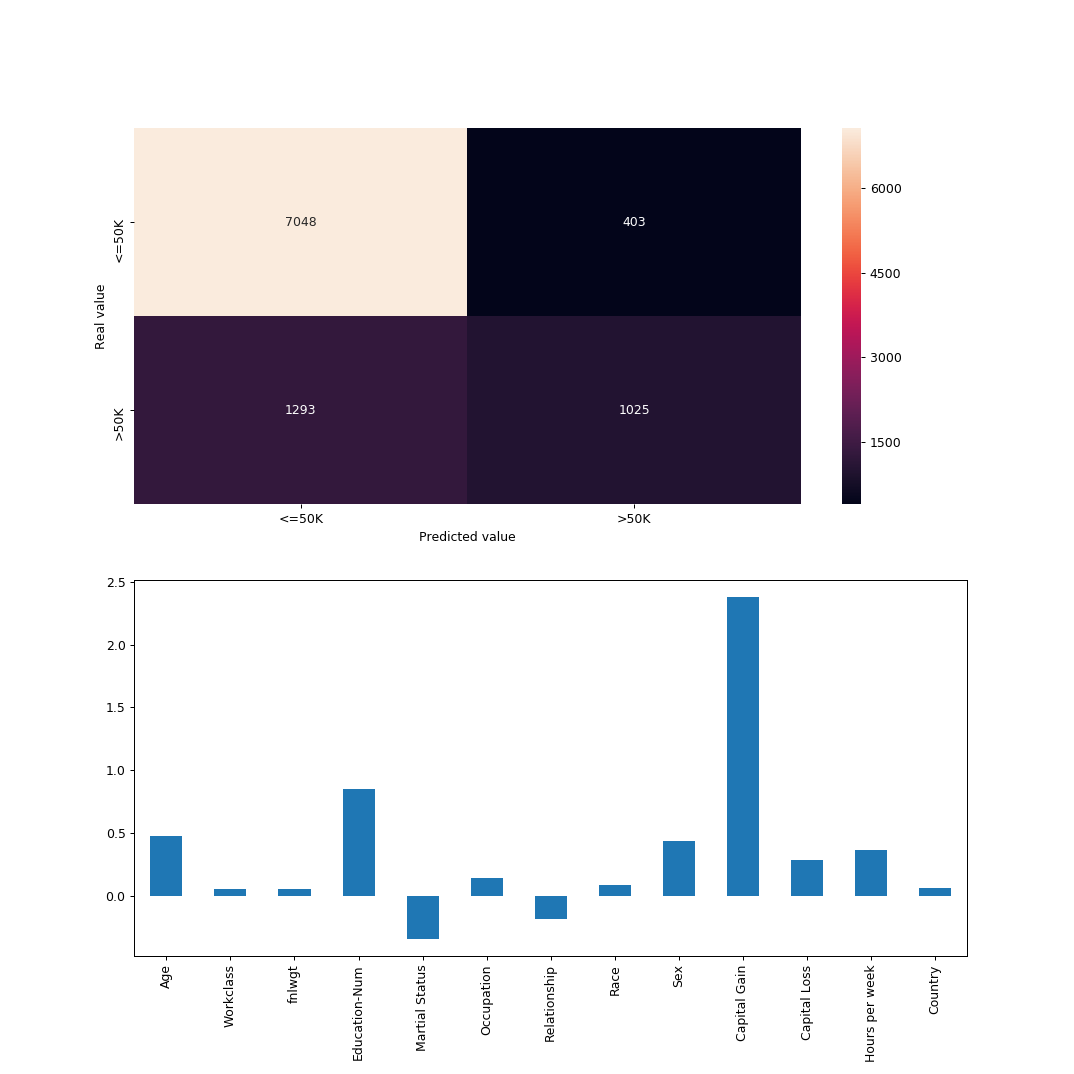

F1 score: 0.547250


In [30]:
# Logistic Regression
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
pl.figure(figsize=(12,12))
pl.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
pl.ylabel("Real value")
pl.xlabel("Predicted value")
print "F1 score: %f" % skl.metrics.f1_score(y_test, y_pred)
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
coefs.sort_values()
pl.subplot(2,1,2)
coefs.plot(kind="bar")
pl.show()
